In [2]:
import pandas as pd
import numpy as np
import re

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

In [3]:
df=pd.read_csv('../data/attacks_limpio.csv', encoding='latin1')

In [4]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,-99,Minor injury to lower leg,N,unknown,unidentified shark specie,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,-99,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [5]:
df[df['age'] > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
year,3462.0,1984.248411,32.112839,1703.0,1964.00,1996.0,2009.00,2018.0
age,3462.0,27.331023,13.919597,1.0,17.00,24.0,35.00,87.0
original_order,3462.0,3823.215482,1558.760184,2.0,2638.25,3985.0,5136.75,6303.0


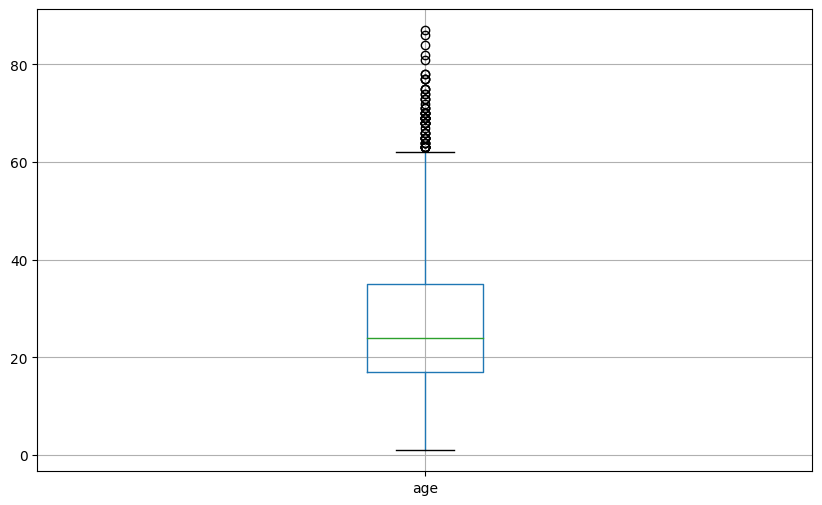

In [6]:
#podemos ver la edad de la gente que recibió ataques

plt.figure(figsize=(10, 6))

df[df['age'] > 0].boxplot(column=['age']);

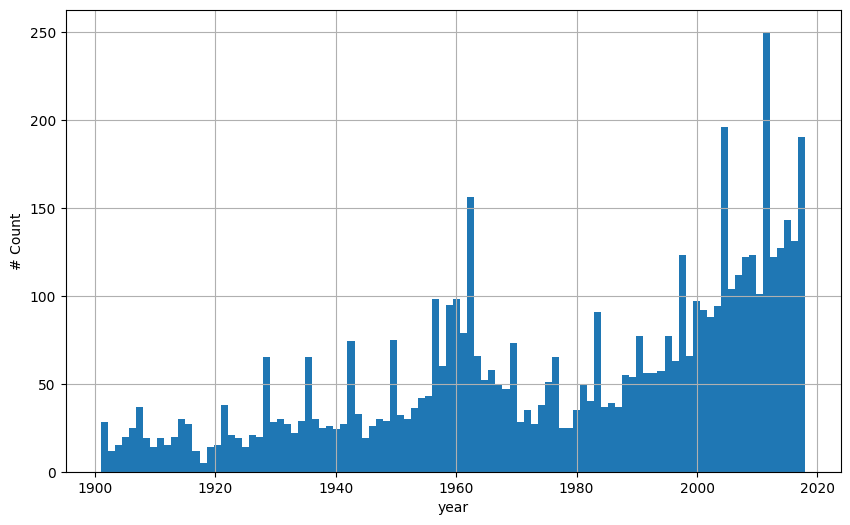

In [7]:
# la evolución de los ataques desde 1900

plt.figure(figsize=(10, 6))



df[df['year'] > 1900].year.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('year');

In [8]:
# cuales son las especies de tiburón que han realizado más ataques

df_speccies = df[~((df['species'] == 'unknown') | (df['species'] == 'unidentified shark specie'))]

In [9]:
df_speccies['species'].value_counts()

white shark             626
tiger shark             256
bull shark              157
nurse shark              90
small shark              65
blacktip shark           60
bronze whaler shark      56
blue shark               49
wobbegong shark          46
mako shark               46
raggedtooth shark        43
hammerhead shark         41
lemon shark              31
zambesi shark            27
sand shark               19
grey reef shark          17
caribbean reef shark     15
spinner shark            15
sevengill shark          12
dusky shark              11
dog shark                 9
basking shark             7
whaler shark              7
angel shark               6
galapagos shark           6
gill shark                5
silky shark               4
blue whaler               2
Name: species, dtype: int64

In [10]:
tibus = df_speccies['species'].value_counts()[df_speccies['species'].value_counts()>40]
tibus = list(tibus.index)

tibus

['white shark',
 'tiger shark',
 'bull shark',
 'nurse shark',
 'small shark',
 'blacktip shark',
 'bronze whaler shark',
 'blue shark',
 'wobbegong shark',
 'mako shark',
 'raggedtooth shark',
 'hammerhead shark']

In [11]:
dtibu = df_speccies[df_speccies['species'].isin(tibus)]

In [12]:
pd.crosstab(dtibu.species, dtibu.fatal)

fatal,N,UNKNOWN,Y
species,,,
blacktip shark,60,0,0
blue shark,39,0,10
bronze whaler shark,54,0,2
bull shark,123,1,33
hammerhead shark,40,0,1
mako shark,44,0,2
nurse shark,89,1,0
raggedtooth shark,43,0,0
small shark,62,1,2


In [13]:
mortal = pd.crosstab(dtibu.species, dtibu.fatal).apply(lambda r: (r/r.sum()*100).round(), axis=1)

mortal

fatal,N,UNKNOWN,Y
species,,,
blacktip shark,100.0,0.0,0.0
blue shark,80.0,0.0,20.0
bronze whaler shark,96.0,0.0,4.0
bull shark,78.0,1.0,21.0
hammerhead shark,98.0,0.0,2.0
mako shark,96.0,0.0,4.0
nurse shark,99.0,1.0,0.0
raggedtooth shark,100.0,0.0,0.0
small shark,95.0,2.0,3.0


In [14]:
tibu_mortales = list(mortal[mortal.Y >= 20].index)

tibu_mortales

['blue shark', 'bull shark', 'tiger shark', 'white shark']

In [15]:
tibu_amables = list(mortal[mortal.Y < 20].index)

tibu_amables

['blacktip shark',
 'bronze whaler shark',
 'hammerhead shark',
 'mako shark',
 'nurse shark',
 'raggedtooth shark',
 'small shark',
 'wobbegong shark']